# Regressi K-NN dan Decision Tree untuk Prediksi `aveOralM`

Notebook ini membangun dua model regresi: **K-Nearest Neighbors (K-NN)** dan **Decision Tree** untuk memprediksi nilai rata-rata suhu mulut (`aveOralM`) menggunakan dataset suhu inframerah manusia.

Evaluasi dilakukan menggunakan:
- **Mean Squared Error (MSE)**: $$MSE = \frac{1}{n} \sum_{i=1}^{n}(y_i - \hat{y}_i)^2 $$
- **Root Mean Squared Error (RMSE)**: $$RMSE = \sqrt{MSE} $$
- **R-squared (R²)**: $$ R^2 = 1 - \frac{\sum (y_i - \hat{y}_i)^2}{\sum (y_i - \bar{y})^2} $$


In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


### Import Data

In [13]:
df = pd.read_csv("Infrared.csv")
df.head()


,Gender,Age,Ethnicity,T_atm,Humidity,Distance,T_offset1,Max1R13_1,Max1L13_1,aveAllR13_1,...,T_FHRC1,T_FHLC1,T_FHBC1,T_FHTC1,T_FH_Max1,T_FHC_Max1,T_Max1,T_OR1,T_OR_Max1,aveOralM
0,Male,41-50,White,24.0,28.0,0.8,0.7025,35.0300,35.3775,34.4000,...,33.4775,33.3725,33.4925,33.0025,34.5300,34.0075,35.6925,35.6350,35.6525,36.59
1,Female,31-40,Black or African-American,24.0,26.0,0.8,0.7800,34.5500,34.5200,33.9300,...,34.0550,33.6775,33.9700,34.0025,34.6825,34.6600,35.1750,35.0925,35.1075,37.19
2,Female,21-30,White,24.0,26.0,0.8,0.8625,35.6525,35.5175,34.2775,...,34.8275,34.6475,34.8200,34.6700,35.3450,35.2225,35.9125,35.8600,35.8850,37.34
3,Female,21-30,Black or African-American,24.0,27.0,0.8,0.9300,35.2225,35.6125,34.3850,...,34.4225,34.6550,34.3025,34.9175,35.6025,35.3150,35.7200,34.9650,34.9825,37.09
4,Male,18-20,White,24.0,27.0,0.8,0.8950,35.5450,35.6650,34.9100,...,35.1600,34.3975,34.6700,33.8275,35.4175,35.3725,35.8950,35.5875,35.6175,37.04


### Membersihkan Data

In [14]:
# Mengecek nilai kosong dan menghapusnya jika ada
print("Jumlah nilai kosong per kolom:\n", df.isnull().sum())
df = df.dropna()


Jumlah nilai kosong per kolom:
 Gender         0
Age            0
Ethnicity      0
T_atm          0
Humidity       0
Distance       2
T_offset1      0
Max1R13_1      0
Max1L13_1      0
aveAllR13_1    0
aveAllL13_1    0
T_RC1          0
T_RC_Dry1      0
T_RC_Wet1      0
T_RC_Max1      0
T_LC1          0
T_LC_Dry1      0
T_LC_Wet1      0
T_LC_Max1      0
RCC1           0
LCC1           0
canthiMax1     0
canthi4Max1    0
T_FHCC1        0
T_FHRC1        0
T_FHLC1        0
T_FHBC1        0
T_FHTC1        0
T_FH_Max1      0
T_FHC_Max1     0
T_Max1         0
T_OR1          0
T_OR_Max1      0
aveOralM       0
dtype: int64


### Encode dan Memisah Fitur Data
tahap ini bertujuan untuk memisahkan kolom fitur yang akan dijadikan parameter dengan kolom yang akan menjadi label untuk diprediksi `"aveOralM"`.
- **Encode:** Untuk kolom yang tipe datanya bukan numerik `"Gender", "Age", "Ethnicity"`, perlu di-encode. Kita akan sebut kolom ini "kolom string", karena mengandung nilai dalam bentuk string.
  - Pertama nilai unik pada kolom string, jadikan kolom.
  - Untuk baris yang memiliki nilai unik tersebut, isi sel dengan nilai `True` atau `1` dalam bentuk numerik.
  - Encoded data akan menghasilkan data yang seluruh kolomnya bertipe numerik, memudahkan dalam penerapan machine learning.
- **Memisahkan data:** Data dipisah 80% untuk training model dan 20% untuk testing model. Dengan begini kita bisa mendapat model yang dapat diuji akurasinya.

In [15]:
# Encode kolom kategorikal menggunakan one-hot encoding
df_encoded = pd.get_dummies(df, columns=["Gender", "Age", "Ethnicity"], drop_first=True)

# Memisahkan fitur dan target
X = df_encoded.drop("aveOralM", axis=1)
y = df_encoded["aveOralM"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### K-Nearest Neighbors (K-NN) Regressor
K-NN adalah algoritma non-parametrik yang memprediksi nilai target berdasarkan rata-rata nilai dari `k` tetangga terdekat dalam ruang fitur. Kedekatan diukur menggunakan metrik seperti Euclidean Distance.
- **Konsep:** Jika tetangga-tetangga dekat memiliki nilai target tertentu, maka data baru akan cenderung mengikuti nilai tersebut.
- **Kelebihan:** Sederhana dan efektif untuk data dengan struktur lokal.
- **Kekurangan:** Sensitif terhadap noise dan outlier, tidak efisien untuk dataset besar.

In [16]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print("K-NN Regressor")
print(f"MSE: {mse_knn:.4f}")
print(f"RMSE: {rmse_knn:.4f}")
print(f"R-squared: {r2_knn:.4f}")


K-NN Regressor
MSE: 0.0829
RMSE: 0.2880
R-squared: 0.5830


### Decision Tree Regressor
Decision Tree membagi data ke dalam subset berdasarkan fitur yang meminimalkan variansi target (dalam konteks regresi). Setiap split menghasilkan keputusan logis seperti "jika X < 10".
- **Konsep:** Data dipisahkan secara rekursif untuk meminimalkan kesalahan prediksi di tiap cabang.
- **Kelebihan:** Mudah diinterpretasi, mampu menangani data non-linear dan fitur kategorikal.
- **Kekurangan:** Rentan terhadap overfitting jika tidak dilakukan pruning.

In [17]:
tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

mse_tree = mean_squared_error(y_test, y_pred_tree)
rmse_tree = np.sqrt(mse_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print("Decision Tree Regressor")
print(f"MSE: {mse_tree:.4f}")
print(f"RMSE: {rmse_tree:.4f}")
print(f"R-squared: {r2_tree:.4f}")


Decision Tree Regressor
MSE: 0.1190
RMSE: 0.3450
R-squared: 0.4016


### Membandingkan Hasil

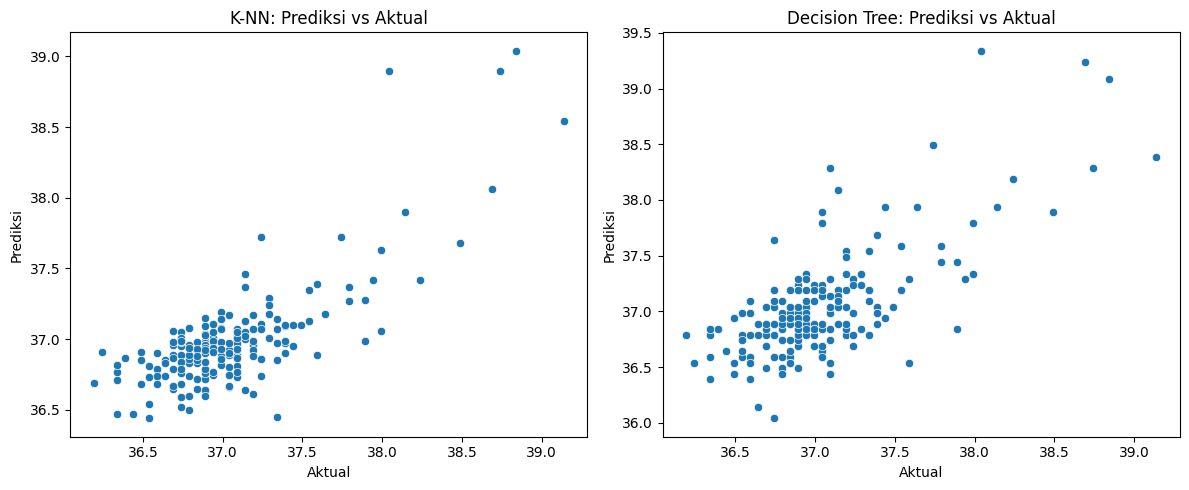

In [18]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=y_pred_knn)
plt.title("K-NN: Prediksi vs Aktual")
plt.xlabel("Aktual")
plt.ylabel("Prediksi")

plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_pred_tree)
plt.title("Decision Tree: Prediksi vs Aktual")
plt.xlabel("Aktual")
plt.ylabel("Prediksi")
plt.tight_layout()
plt.show()


### Rangkuman Hasil Evaluasi Model
| Model	| MSE	| RMSE	| R² |
|---|---|---|---|
| K-NN Regressor	| 0.0829 |	0.2880 |	0.5830 |
| Decision Tree	| 0.1190 |	0.3450 |	0.4016 |

- MSE (Mean Squared Error): Rata-rata dari kuadrat selisih antara nilai aktual dan prediksi. Semakin kecil, semakin baik.
- RMSE (Root MSE): Akar dari MSE, memberikan skala error yang sama dengan data asli.
- R² (R-Squared): Proporsi variasi dalam data target yang bisa dijelaskan oleh model. Nilai 1 berarti prediksi sempurna, 0 berarti prediksi acak.

### Hasil
- **K-NN** memberikan hasil lebih baik dibandingkan Decision Tree pada dataset ini:
  - Lebih kecil nilai MSE dan RMSE, maka prediksi lebih akurat.
  - Nilai R² sebesar 0.5830, artinya model menjelaskan sekitar 58.3% variasi dalam data target, cukup baik untuk model sederhana.
- **Decision Tree** memiliki akurasi lebih rendah (R² = 0.4016), dan menghasilkan error lebih besar, kemungkinan karena:
  - Model terlalu kompleks dan overfit.
  - Struktur pembagian tidak mampu menangkap pola lokal dengan baik seperti K-NN.